# Understanding Complex Exponentials

In [1]:
import numpy as np
from matplotlib import pyplot as plt

PI = np.pi

According to the non-linear dynamic model you played with earlier, the pitch rate for a fixed-wing vehicle near trim looked something like this

![](pitch_rate.png)

The goal of this section is to convince you that we can actually describe the shape of this graph using a **superposition of oscillating and decaying motions** and we can describe such superpositions as **combinations of complex numbers**.

Don't worry if that doesn't all make sense yet! Read carefully and it will make sense soon.

## 1. Oscillations and Growth/Decay

An **oscillation** is a back and forth motion. For example, the cosine function oscillates.

$$y(t) = \cos(\omega t)$$

This equation will oscillate with an **angular frequency** $\omega$. Angular frequency is measured in radians per second: so if $\omega = 2\pi$, then this function will oscillate once per second.

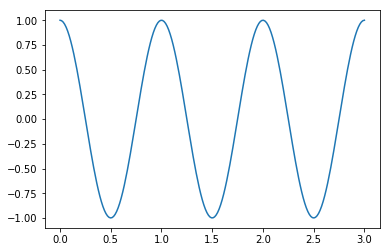

In [2]:
# time variable for plotting 
t = np.linspace(0, 3, 200)

cycles_per_second = 1.0
omega = 2 * PI * cycles_per_second

y = np.cos(omega * t)
plt.plot(t, y)

**Exponential growth / decay** is given by exponential functions:

$$y(t) = e^{kt}$$

When $k$ is negative, we see decay. When $k$ is positive, we see growth.

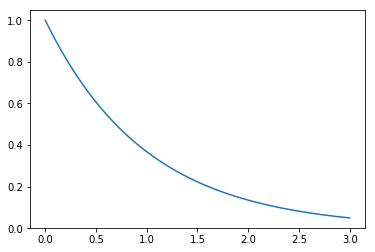

In [8]:
# example of decay

# todo: change the k to +1.0 to see exponential growth.

t = np.linspace(0,3,100)
k = -1
y = np.exp(k*t)
plt.plot(t,y)

We can also create functions that combine exponential growth / decay with oscillatory motion.

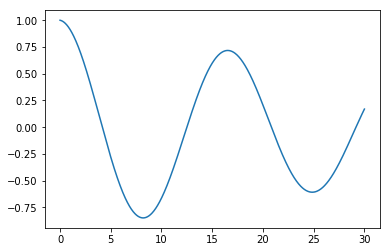

In [46]:
t = np.linspace(0,30,1000)

k = -0.02
omega = 0.12 * PI * cycles_per_second

y = np.exp(k*t) * np.cos(omega*t)
plt.plot(t,y)

That's starting to look pretty close to our original graph!

**TODO** - adjust `t` so it spans 30 seconds (like the graph at the top of the page) and thne play around with `k` and `omega` until the graph looks pretty close to the graph shown at the top of the page.

## 2. Complex Numbers

We use the letter $i$ or $j$ to represent $\sqrt{-1}$.

Note: the `sqrt` function in Python's normal `math` module won't accept negative arguments. The `sqrt` function in the `cmath` module will.

In [26]:
from cmath import sqrt

sqrt(-1)

1j

We can then define a "complex number" as a number with a real part and an imaginary part. If $a$ and $b$ are real numbers, then $a + bi$ is a complex number with "real part" $a$ and "imaginary part" $b$.

In [27]:
# note: I've purposely mis-spelled lambda, 
#  since "lambda" is a python keyword
lamda = np.complex(2.0, 3.0)

print(lamda, "is a complex number.", "\nThe real part is", lamda.real, 
      "\nThe imaginary part is", lamda.imag)

(2+3j) is a complex number. 
The real part is 2.0 
The imaginary part is 3.0


We can also define "complex conjugates". The complex conjugate of $a+bi$ is $a-bi$: the imaginary part just changes signs.

In [28]:
print(" lambda:          ", lamda,
      "\n",
      "lambda conjugate:", lamda.conjugate())

 lambda:           (2+3j) 
 lambda conjugate: (2-3j)


When you multiply a complex number by it's conjugate, you always get a real number:

In [29]:
print(lamda * lamda.conjugate())

(13+0j)


## 3. "The most beautiful theorem in mathematics"

If you haven't seen it derived, you might want to pause Udacity for a moment and take some time to research [Euler's Identity](https://en.wikipedia.org/wiki/Euler%27s_identity). This theory has been called "the most beautiful theorem in mathematics" for good reason.

If you've seen it before or just want to get to the actual applications, I'll state it here without proof:

$$e^{i \pi} + 1 = 0$$

This identity is incredible. It succinctly demonstrates a deep mathematical relationship between:

* $e$, the base of the natural logarithm...
* $i$, the square root of negative 1...
* $\pi$, the ratio of a circle's circumference to its diameter...
* $1$, the multiplicative identity, and...
* $0$, the additive identity.

We can "prove" this works using python (unfortunately, floating point math means we see some TINY number instead of 0 as output to the code below).

In [30]:
i  = np.complex(0.0, 1.0)
pi = np.complex(np.pi, 0.0)

np.exp(i * pi) + 1.0

1.2246467991473532e-16j

Underlying this identity is **Euler's Formula**, which says that for any real number $x$

$$e^{ix} = \cos x + i \sin x$$

There's something important to notice here!

> **Imaginary** exponentials lead to oscillatory behavior!

This identity gives us a tool for studying exponentials with **imaginary** exponents. But what about **complex** exponentials with real AND imaginary parts?

## 4. Complex Exponentials

The rules of algebra tell us that we can rewrite a complex exponential as a product of a real exponential and an imaginary exponential:

$$e^{(a + bi)t} = e^{at}e^{ibt}$$

We know that $e^{at}$ leads to growth / decay and we know that $e^ibt$ leads to oscillations. So this complex exponential should exhibit exponential behavior AND oscillatory behavior!

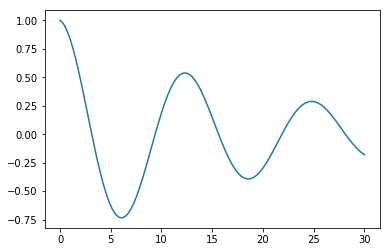

In [31]:
t = np.linspace(0,30,100)
omega = 2 * PI * 2.0 / 25
lamda = np.complex(-0.05, omega)
y = np.exp(lamda * t)

# note that since y is complex, we plot only the real part
plt.plot(t, y.real)

## 5. Combinations of Complex Exponentials

We can form more complex motions by combining different complex exponentials...

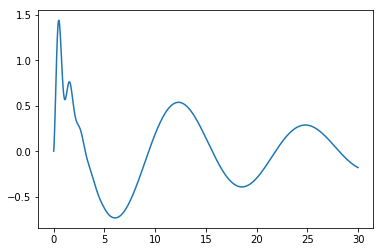

In [32]:
t = np.linspace(0,30, 1000)
omega = 2 * PI * 2.0 / 25
LAMBDA_1 = np.complex(-0.05, omega)
LAMBDA_2 = np.complex(-1.3, 1.8*PI)

y = np.exp(LAMBDA_1 * t) + -1 * np.exp(LAMBDA_2 * t)


plt.plot(t, y.real)

This looks VERY similar to the graph that you saw near the beginning of this lesson!

Let's compare this graph to the actual pitch rate data that generated the original graph...

In [47]:
# load pitch rate data
import pickle
with open("pitch_rate_data.pickle", 'rb') as f:
    data = pickle.load(f)
    
t = data['time']
q = data['q']

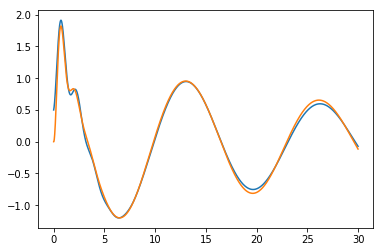

In [48]:
A1 = 1.5
A2 = -1.0
T1 = 13.2
T2 = 1.6
D1 = -0.035
D2 = -0.8

omega_1 = 2 * PI / T1
omega_2 = 2 * PI / T2

lambda_1 = np.complex(D1, omega_1)
lambda_2 = np.complex(D2, omega_2)

y = A1 * np.exp(lambda_1 * t) + A2 * np.exp(lambda_2 * t)
plt.plot(t, y.real)
plt.plot(t, q)